In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def dsigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [5]:
dsigmoid(0)

0.25

In [6]:
x = np.arange(-5, 5, 0.01)

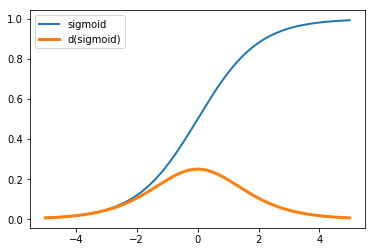

In [7]:
sig = sigmoid(x)
plt.plot(x, sig, linewidth=2)
plt.plot(x, dsigmoid(x), linewidth=3)
plt.legend(['sigmoid', 'd(sigmoid)'])
plt.show()

In [8]:
# Dataset
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print("['sentosa' 'non-sentosa']")
iris_X, iris_Y = iris.data[:-1,:], iris.target[:-1]
numFeatures = iris_X.shape[1]
numLabels = 1
X = iris_X
Y = []
for ele in iris_Y:
    if ele == 0:
        Y.append(1.0)
    else:
        Y.append(0.0)
Y = np.asarray(Y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
['sentosa' 'non-sentosa']


# Non Vectorized Version

In [9]:
# Define Weights
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numLabels))
b = np.random.normal(loc=0.0, scale=0.01, size=(1, numLabels))

# Hyper Parameters
epochs = 1000
learning_rate = 1e-2
losses = []

for i in range(epochs):
    l = 0
    dw = [0 for z in range(numFeatures)]
    db = 0
    for j in range(149):
        
        z = np.add(np.matmul(X[j].reshape((1,4)), w), b)
        a = sigmoid(z)
        # Loss Function
        l += -(Y[j]*np.log(a) + (1-Y[j])*np.log(1-a))
        
        dz = a - Y[j]
        for k in range(numFeatures):
            # Compute Gradients
            dw[k] += X[j][k]*dz[0][0]
            db += dz[0][0]
    
    dw = np.asarray(dw)/149
    db = np.asarray(db)/149
    ls = l/149
    dw = dw.reshape((4,1))
    # Update Weights and biases
    w = w - learning_rate*dw
    b = b - learning_rate*db
    losses.append(ls[0][0])

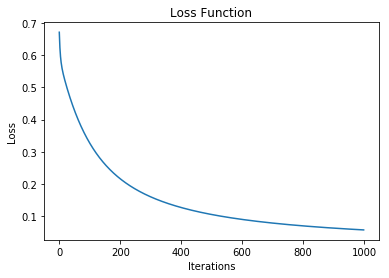

In [10]:
# Plots
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

In [11]:
Y_pred = []
A = []
Z = []
count = 0
for i in range(149):
    z = np.add(np.matmul(X[i].reshape((1,4)), w), b)
    Z.append(z)
    a = sigmoid(z)
    A.append(a[0][0])
    if a[0][0] >= 0.5 and Y[i] == 1:
        count += 1
        Y_pred.append(1.0)
    if a[0][0] < 0.5 and Y[i] == 0:
        count += 1
        Y_pred.append(0.0)
print('Accuracy : ', count/149*100, '%')
y = np.asarray(Y, dtype=np.int32)

Accuracy :  100.0 %


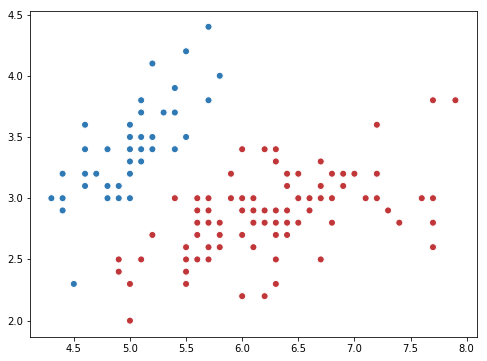

In [12]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [13]:
Y = Y.reshape((149, 1))
print(X.shape, Y.shape)
print(w.shape, b.shape)

(149, 4) (149, 1)
(4, 1) (1, 1)


# Vectorized Version

0.058623762205345945


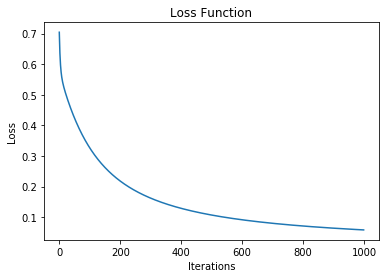

In [14]:
# Define Weights
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numLabels))
b = np.random.normal(loc=0.0, scale=0.01, size=(1, numLabels))

# Hyper Parameters
epochs = 1000
learning_rate = 1e-2
losses = []
for i in range(epochs):
    
    # Model
    z = np.add(np.matmul(X, w), b)
    a = sigmoid(z)
    
    # Loss
    l = np.sum(- (Y*np.log(a) + (1-Y)*np.log(1-a)), axis=0, keepdims=True).T[0][0]/149
    losses.append(l)
    
    dz = a - Y
    dw  = X*dz
    
    # Gradients
    dw = np.sum(dw, axis=0, keepdims=True).T/149
    db = np.sum(dz, axis=0, keepdims=True).T/149
    
    #Update Weights
    w = w - learning_rate*dw
    b = b - learning_rate*db

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function')
print(losses[-1])

In [15]:
Y_pred = []
A = []
Z = []
count = 0
for i in range(149):
    z = np.add(np.matmul(X[i].reshape((1,4)), w), b)
    Z.append(z)
    a = sigmoid(z)
    A.append(a[0][0])
    if a[0][0] >= 0.5 and Y[i] == 1:
        count += 1
        Y_pred.append(1.0)
    if a[0][0] < 0.5 and Y[i] == 0:
        count += 1
        Y_pred.append(0.0)
print('Accuracy : ', count/149*100, '%')
y = np.asarray(Y, dtype=np.int32)

Accuracy :  100.0 %
